# Kaggle - GiveMeSomeCredit Compettition
Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.

The goal of this competition is to build a model that borrowers can use to help make the best financial decisions.

Historical data are provided on 250,000 borrowers and the prize pool is $5,000.

In [2]:
# Import all Dependency for this project
import numpy as np
import pandas as pd
from fastai.structured import *
from sklearn.model_selection import train_test_split

# Dependency for visualization
import matplotlib.pyplot as plt
% matplotlib inline
from scikitplot.metrics import plot_confusion_matrix
import seaborn as sns

# Dependency for handling imbalance classes
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [3]:
# Defind path of raw data
PATH = 'data/'

In [6]:
# Take a look at Data Dictionary for understanding
Data_dict = pd.read_excel(f'{PATH}Data Dictionary.xls', sheet_name='Sheet1', header=1)
Data_dict

,Variable Name,Description,Type
0,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
1,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
2,age,Age of borrower in years,integer
3,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
4,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
5,MonthlyIncome,Monthly income,real
6,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
7,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
8,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer
9,NumberOfTime60-89DaysPastDueNotWorse,Number of times borrower has been 60-89 days p...,integer


In [18]:
# Modify variable name abit
Data_dict.iloc[3,0] = Data_dict.iloc[3,0].replace('-', '_')
Data_dict.iloc[9,0] = Data_dict.iloc[9,0].replace('-', '_')

In [22]:
col_name = Data_dict.iloc[:,0].values

## It's time to read data in!!

In [29]:
df_raw = pd.read_csv(f'{PATH}cs-training.csv', index_col='Unnamed: 0')
df_raw.columns = col_name
df_raw.info()
print('Shape of the dataset', df_raw.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30_59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60_89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB
Shape of the dataset (150000, 11)


## Preprocessing Data

#### Check Missing data

In [30]:
df_raw.isna().sum()/len(df_raw)

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30_59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.198207
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60_89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.026160
dtype: float64

We find some missing data for column "MonthlyInncome' and 'NumberOfDependents'.

Since 

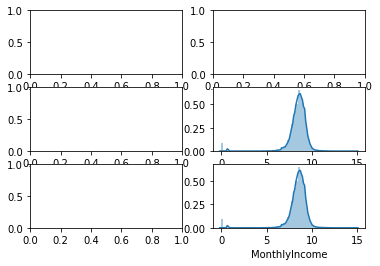

In [44]:
fig, axs = plt.subplots(ncols=2, nrows=3)
sns.distplot(np.log(df_raw.MonthlyIncome.dropna()+1), bins=100, ax=axs[1,1])
sns.distplot(np.log(df_raw.MonthlyIncome.dropna()+1), bins=100)

In [45]:
Monthly = df_raw.MonthlyIncome.dropna()

In [48]:
sd = np.std(Monthly)
med = np.median(Monthly)

In [55]:
upper = med+3*sd
lower = med-3*sd

In [58]:
del_idx = Monthly[Monthly > upper].index

In [60]:
test = df_raw.drop(del_idx, axis=0)

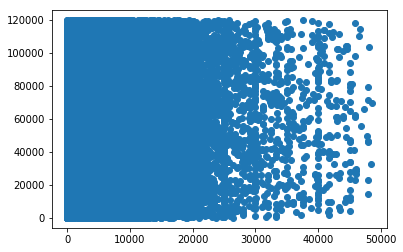

In [69]:
plt.scatter(test.MonthlyIncome.dropna(), range(test.MonthlyIncome.dropna().shape[0]))

(array([ 4390.,  6237., 11903., 14549., 14846., 13483., 11593.,  9164.,  7558.,  5609.,  5739.,  3094.,
         2919.,  1765.,  1331.,  1209.,   789.,   698.,   564.,   366.,   404.,   268.,   174.,   142.,
          127.,   196.,    78.,    70.,    60.,    45.,   109.,    33.,    52.,    17.,    47.,    24.,
           47.,    16.,    30.,    12.,    14.,    57.,    28.,    10.,    20.,    12.,    19.,    11.,
            3.,    10.]),
 array([    0.,   970.,  1940.,  2910.,  3880.,  4850.,  5820.,  6790.,  7760.,  8730.,  9700., 10670.,
        11640., 12610., 13580., 14550., 15520., 16490., 17460., 18430., 19400., 20370., 21340., 22310.,
        23280., 24250., 25220., 26190., 27160., 28130., 29100., 30070., 31040., 32010., 32980., 33950.,
        34920., 35890., 36860., 37830., 38800., 39770., 40740., 41710., 42680., 43650., 44620., 45590.,
        46560., 47530., 48500.]),
 <a list of 50 Patch objects>)

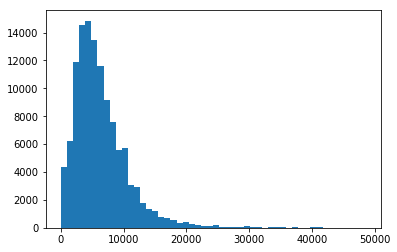

In [77]:
plt.hist(test.MonthlyIncome.dropna(), bins=50 )

In [31]:
df_raw.MonthlyIncome.dropna().median()

5400.0

In [8]:
df_raw = df_raw.dropna()
df_raw.shape

(120269, 11)

In [10]:
df_raw.isna().sum()/len(df_raw)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

## Clustering

In [13]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=2)
group = cluster.fit_predict(df_raw)
#group = cluster.fit_predict(df_raw.drop('MonthlyIncome', axis=1))
df_raw['group'] = group

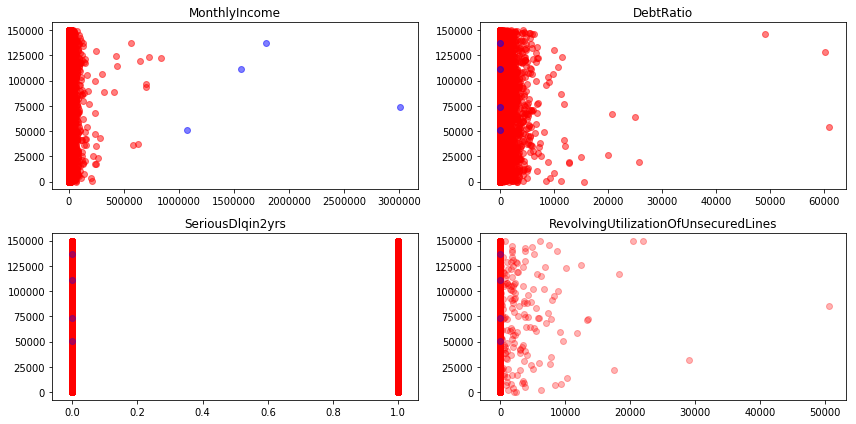

In [14]:
f, axes = plt.subplots(2,2, figsize = (12,6))
axes[0,0].scatter(df_raw.MonthlyIncome[df_raw.group == 0], df_raw.index[df_raw.group == 0], color='r', alpha = 0.5)
axes[0,0].scatter(df_raw.MonthlyIncome[df_raw.group == 1], df_raw.index[df_raw.group == 1], color='b', alpha = 0.5)
#axes[0,0].scatter(df_raw.MonthlyIncome[df_raw.group == 2], df_raw.index[df_raw.group == 2], color='g', alpha = 0.5)
axes[0,0].set_title('MonthlyIncome')
axes[0,1].scatter(df_raw.DebtRatio[df_raw.group == 0], df_raw.index[df_raw.group == 0], color='red', alpha = 0.5)
axes[0,1].scatter(df_raw.DebtRatio[df_raw.group == 1], df_raw.index[df_raw.group == 1], color='b', alpha = 0.5)
axes[0,1].set_title('DebtRatio')
axes[1,0].scatter(df_raw.SeriousDlqin2yrs[df_raw.group == 0], df_raw.index[df_raw.group == 0], color='red', alpha = 0.3)
axes[1,0].scatter(df_raw.SeriousDlqin2yrs[df_raw.group == 1], df_raw.index[df_raw.group == 1], color='b', alpha = 0.3)
axes[1,0].set_title('SeriousDlqin2yrs')
axes[1,1].scatter(df_raw.RevolvingUtilizationOfUnsecuredLines[df_raw.group == 0], df_raw.index[df_raw.group == 0], color='r', alpha=0.3)
axes[1,1].scatter(df_raw.RevolvingUtilizationOfUnsecuredLines[df_raw.group == 1], df_raw.index[df_raw.group == 1], color='b', alpha=0.3)
axes[1,1].set_title('RevolvingUtilizationOfUnsecuredLines')
plt.tight_layout()
#plt.scatter(df_raw.MonthlyIncome[df_raw.group == 1], df_raw.index[df_raw.group == 1], color='blue', alpha=0.5)

As i try to do clusters to pull out those outlier, it seem this strategy not working well.

The algorithm try to make clusters but it can capture outlier just from only 1 variable. Outliner of other variables still the same.

In [15]:
print(df_raw.SeriousDlqin2yrs.value_counts())
print('Class 0 poportion: ',df_raw.SeriousDlqin2yrs.value_counts()[0]/len(df_raw)*100, '%' )
print('Class 1 poportion: ',df_raw.SeriousDlqin2yrs.value_counts()[1]/len(df_raw)*100, '%' )

0    111912
1      8357
Name: SeriousDlqin2yrs, dtype: int64
Class 0 poportion:  93.0514097564626 %
Class 1 poportion:  6.948590243537403 %


From the output above, we see that each class has unequal cases where class 0 which mean no serious problem are much more than class 1. Maybe an oversampling or undersampling technique needed for this case.

## Test undersampling

In [29]:
rus = RandomUnderSampler()
x = df_raw.drop('SeriousDlqin2yrs',axis=1)
y = df_raw.SeriousDlqin2yrs
x_re, y_re = rus.fit_sample(x, y)

In [30]:
x_re = pd.DataFrame(x_re, columns=x.columns)
y_re = pd.DataFrame(y_re, columns=['SeriousDlqin2yrs'])

In [13]:
print(y_re.SeriousDlqin2yrs.value_counts())
print('Class 0 porpotion: ', y_re.iloc[:,0].value_counts()[0]/len(y_re)*100, '%' )
print('Class 1 porpotion: ', y_re.iloc[:,0].value_counts()[1]/len(y_re)*100, '%' )

1    8357
0    8357
Name: SeriousDlqin2yrs, dtype: int64
Class 0 porpotion:  50.0 %
Class 1 porpotion:  50.0 %


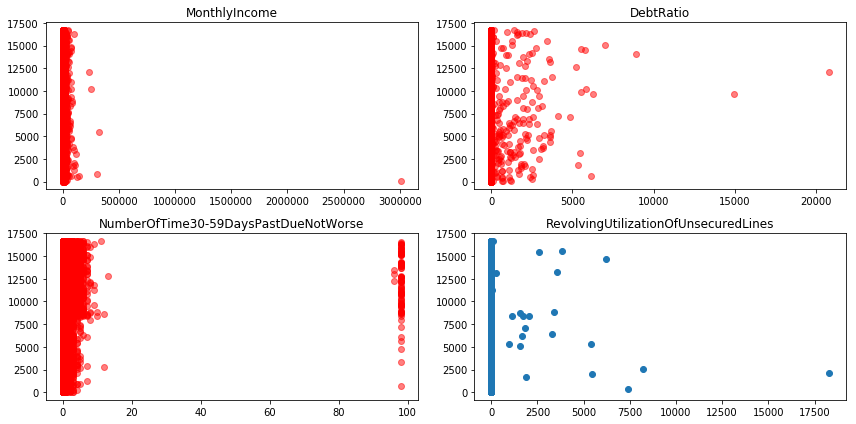

In [31]:
f, axes = plt.subplots(2,2, figsize = (12,6))
axes[0,0].scatter(x_re.MonthlyIncome, x_re.index, color='red', alpha = 0.5)
axes[0,0].set_title('MonthlyIncome')
axes[0,1].scatter(x_re.DebtRatio, x_re.index, color='red', alpha = 0.5)
axes[0,1].set_title('DebtRatio')
axes[1,0].scatter(x_re['NumberOfTime30-59DaysPastDueNotWorse'], x_re.index, color='red', alpha = 0.5)
axes[1,0].set_title('NumberOfTime30-59DaysPastDueNotWorse')
axes[1,1].scatter(x_re.RevolvingUtilizationOfUnsecuredLines, x_re.index)
axes[1,1].set_title('RevolvingUtilizationOfUnsecuredLines')
plt.tight_layout()
#plt.scatter(df_raw.MonthlyIncome[df_raw.group == 1], df_raw.index[df_raw.group == 1], color='blue', alpha=0.5)

## Test Oversampling

In [40]:
from sklearn.utils import resample

In [85]:
df1 = resample(df_raw[df_raw.SeriousDlqin2yrs==1], replace=True, n_samples=32000)
df0 = resample(df_raw[df_raw.SeriousDlqin2yrs==0], replace=False, n_samples=32000)

In [86]:
df0.shape

(32000, 12)

In [87]:
df_new = pd.concat([df1,df0], axis=0)

In [88]:
df_new = df_new.reset_index().drop('index', axis=1)

In [89]:
df_new.reset_index(inplace=True)
chosen_idx = np.random.choice(len(df_new), replace=False, size=5000)
df_test = df_new.iloc[chosen_idx]
df = df_new.drop(df_test.index, axis=0)

In [90]:
print('df_test spahe: ', df_test.shape)
print('df shape: ', df.shape)

df_test spahe:  (5000, 13)
df shape:  (59000, 13)


In [100]:
ros = RandomOverSampler()
x = df_raw.drop('SeriousDlqin2yrs',axis=1)
y = df_raw.SeriousDlqin2yrs
x_re, y_re = ros.fit_sample(x, y)

In [34]:
x_re = pd.DataFrame(x_re, columns=x.columns)
y_re = pd.DataFrame(y_re, columns=['SeriousDlqin2yrs'])

In [35]:
print(y_re.SeriousDlqin2yrs.value_counts())
print('Class 0 porpotion: ', y_re.iloc[:,0].value_counts()[0]/len(y_re)*100, '%' )
print('Class 1 porpotion: ', y_re.iloc[:,0].value_counts()[1]/len(y_re)*100, '%' )

1    111912
0    111912
Name: SeriousDlqin2yrs, dtype: int64
Class 0 porpotion:  50.0 %
Class 1 porpotion:  50.0 %


## Imputation

## Data is ready for modeling

In [34]:
df_raw.reset_index(inplace=True)
chosen_idx = np.random.choice(len(df_raw), replace=False, size=15000)
df_test = df_raw.iloc[chosen_idx]
df = df_raw.drop(df_test.index, axis=0)

In [36]:
print('df_test spahe: ', df_test.shape)
print('df shape: ', df.shape)

df_test spahe:  (15000, 13)
df shape:  (134996, 13)


### Split Train and Validation set 

In [104]:
x = df.drop(['SeriousDlqin2yrs', 'index'],axis=1)
y = df.SeriousDlqin2yrs
x_test = df_test.drop(['SeriousDlqin2yrs', 'index'],axis=1)
y_test = df_test.SeriousDlqin2yrs

In [105]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state=1)

In [106]:
print('x_train spahe: ', x_train.shape)
print('x_val shape: ', x_val.shape)
print('x_test shape: ', x_test.shape)

x_train spahe:  (47200, 11)
x_val shape:  (11800, 11)
x_test shape:  (5000, 11)


In [107]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
m = RandomForestClassifier(n_estimators=100, min_samples_leaf=3, random_state=1)
m.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [123]:
print('Training score: ',m.score(x_train, y_train))
print('Validation score: ', m.score(x_val, y_val))
print('Testing score: ', m.score(x_test, y_test))

Training score:  0.969406779661017
Validation score:  0.9047457627118644
Testing score:  0.9004


In [101]:
from fastai.structured import *

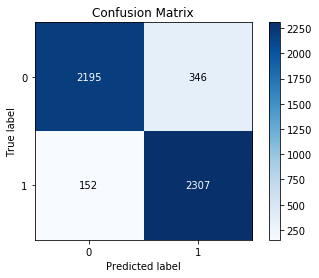

In [124]:
plot_confusion_matrix(y_test, m.predict(x_test))

In [125]:
fi = rf_feat_importance(m, x_train)
fi

,cols,imp
0,RevolvingUtilizationOfUnsecuredLines,0.259249
3,DebtRatio,0.127484
4,MonthlyIncome,0.112805
6,NumberOfTimes90DaysLate,0.108408
1,age,0.102751
2,NumberOfTime30-59DaysPastDueNotWorse,0.102323
5,NumberOfOpenCreditLinesAndLoans,0.072715
8,NumberOfTime60-89DaysPastDueNotWorse,0.056086
7,NumberRealEstateLoansOrLines,0.029388
9,NumberOfDependents,0.028790


In [60]:
m2 = RandomForestClassifier(n_estimators=100, min_samples_leaf=5, random_state=1)
m2.fit(x_train2, y_train2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [57]:
x_train2 = x_train[x_train.group == 1]
y_train2 = y_train[x_train.group == 1]
x_val2 = x_val[x_val.group == 1]
y_val2 = y_val[x_val.group == 1]
x_test2 = x_test[x_test.group == 1]
y_test2 = y_test[x_test.group == 1]


In [61]:
print('Training score: ',m2.score(x_train2, y_train2))
print('Validation score: ', m2.score(x_val2, y_val2))
print('Testing score: ', m2.score(x_test2, y_test2))

Training score:  0.9532775194947118
Validation score:  0.9354026224164753
Testing score:  0.9352537174101487


In [126]:
ran = get_sample(x_train, 500)

In [127]:
from pdpbox import pdp
from plotnine import *

In [131]:
def plot_pdp2(feat, clusters=None, feat_name=None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(m, x, feat)
    return pdp.pdp_plot(p, feat_name, plot_lines=True, 
                        cluster=clusters is not None, n_cluster_centers=clusters)

In [128]:
def plot_dpd(m, df, feature):
    p = pdp.pdp_isolate(m, df, feature)
    pdp.pdp_plot(p, feature, plot_lines=True)

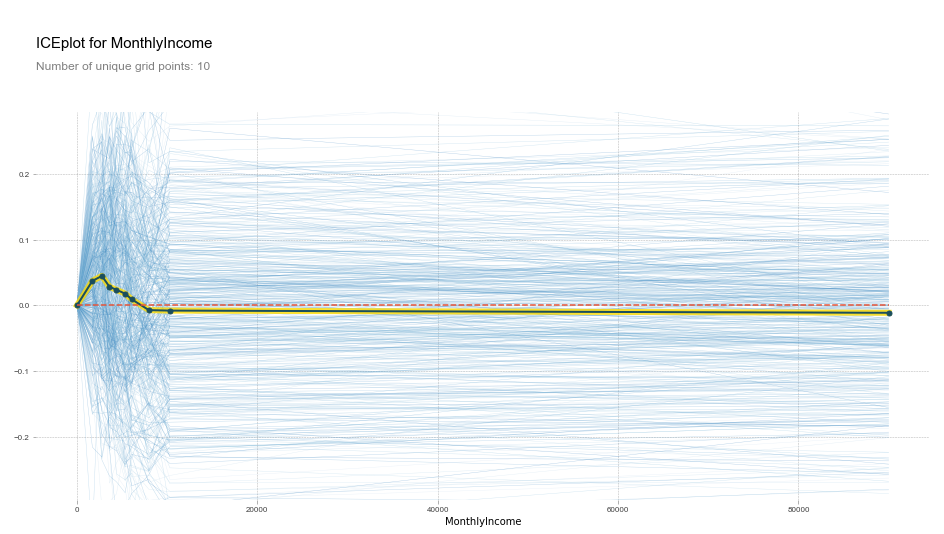

In [129]:
plot_dpd(m,ran,'MonthlyIncome')

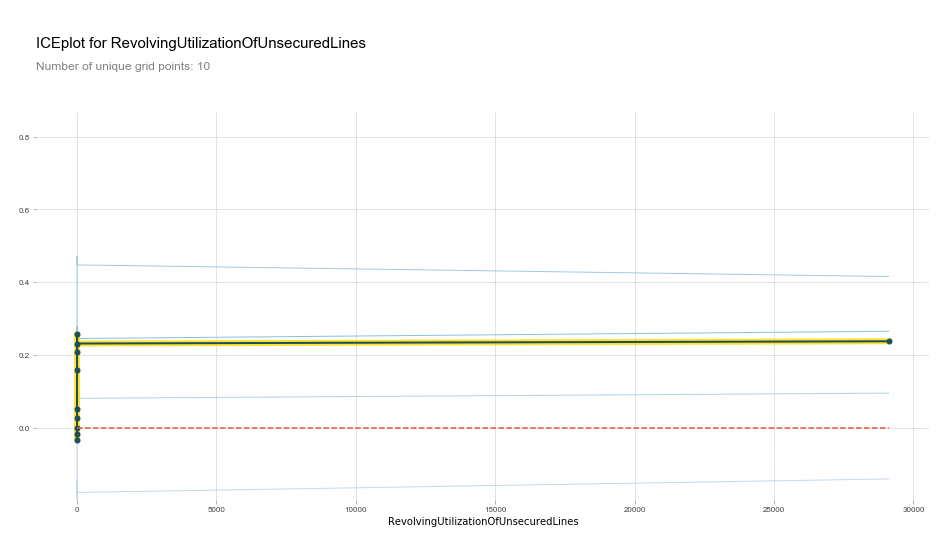

In [134]:
plot_pdp2('RevolvingUtilizationOfUnsecuredLines', clusters=4)

In [69]:
df_raw.shape

(149996, 13)

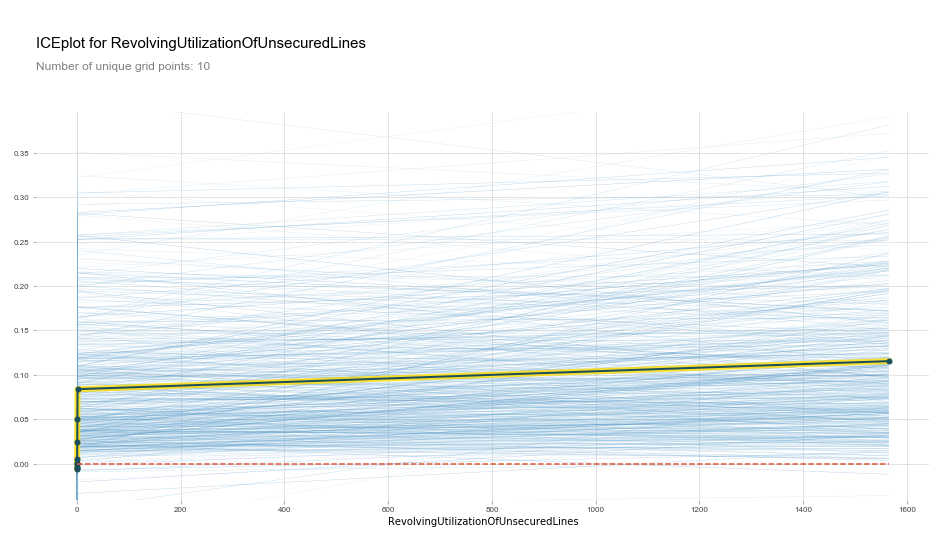

In [72]:
plot_dpd(m,ran,'RevolvingUtilizationOfUnsecuredLines')

In [25]:
from sklearn.linear_model import LogisticRegressionCV

In [74]:
m3 = LogisticRegressionCV(cv = 10, n_jobs=-1)
m3.fit(x_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [75]:
print('Training score: ',m3.score(x_train, y_train))
print('Validation score: ', m3.score(x_val, y_val))
print('Testing score: ', m3.score(x_test, y_test))

Training score:  0.9337753250120375
Validation score:  0.932962962962963
Testing score:  0.931


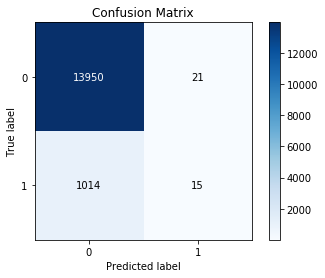

In [76]:
plot_confusion_matrix(y_test, m3.predict(x_test))

In [26]:
x_train, x_val, y_train, y_val = train_test_split(x_re, y_re, test_size = 0.2, random_state=1)

In [27]:
m = RandomForestClassifier(n_estimators=150, min_samples_leaf=20, max_features=0.5)
m.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
print('Training score: ',m.score(x_train, y_train))
print('Validation score: ', m.score(x_val, y_val))

Training score:  0.929364064358675
Validation score:  0.911068915447336


In [29]:
fi = rf_feat_importance(m, x_train)
fi

,cols,imp
0,RevolvingUtilizationOfUnsecuredLines,0.335420
6,NumberOfTimes90DaysLate,0.124466
2,NumberOfTime30-59DaysPastDueNotWorse,0.119970
3,DebtRatio,0.105401
4,MonthlyIncome,0.088445
1,age,0.075974
8,NumberOfTime60-89DaysPastDueNotWorse,0.060253
5,NumberOfOpenCreditLinesAndLoans,0.049910
7,NumberRealEstateLoansOrLines,0.021313
9,NumberOfDependents,0.018849


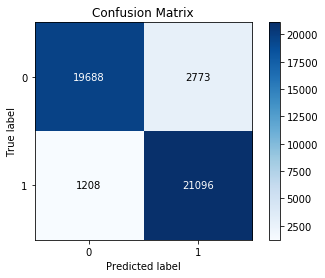

In [30]:
plot_confusion_matrix(y_val, m.predict(x_val))

In [52]:
ran = get_sample(x_train[x_train.RevolvingUtilizationOfUnsecuredLines < 5], 500)

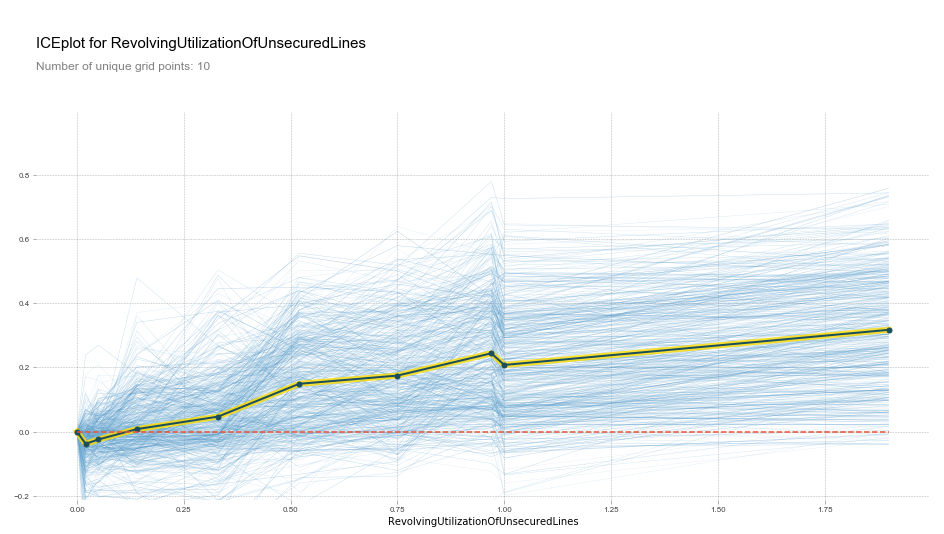

In [53]:
plot_dpd(m,ran,'RevolvingUtilizationOfUnsecuredLines')

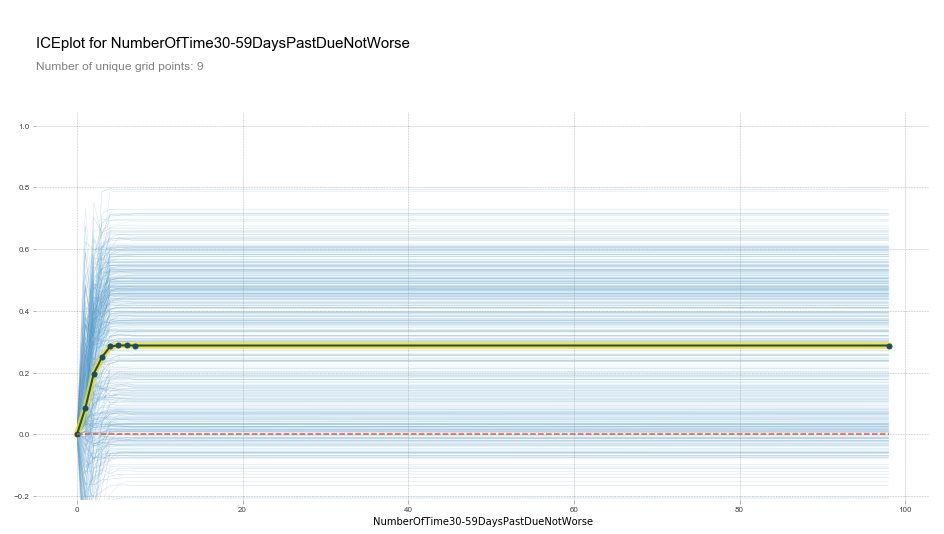

In [54]:
plot_dpd(m,ran,'NumberOfTime30-59DaysPastDueNotWorse')

In [164]:
ran = get_sample(x_train[x_train['NumberOfTime30-59DaysPastDueNotWorse'] < 90], 500)
x_train['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

0.0     9081
1.0     2269
2.0     1011
3.0      499
4.0      251
5.0      106
98.0      64
6.0       56
7.0       21
8.0        7
96.0       2
9.0        1
13.0       1
12.0       1
10.0       1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [169]:
x_train.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [173]:
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch import optim as optim

In [170]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.lin1 = nn.Linear(10, 100)
        self.lin2 = nn.Linear(100, 100)
        self.lin3 = nn.Linear(100,1)
        
    def forward(self, x):
        x = F.relu(self.lin1(x))
        x = F.relu(self.lin2(x))
        x = F.sigmoid(self.lin3(x))
        return x

In [171]:
net = Net()

In [174]:
loss=nn.BCELoss()
learning_rate = 1e-3
optimizer=optim.Adam(net.parameters(), lr=learning_rate)

In [ ]:
x_train = torch.Tensor(x_train)

In [175]:
for t in range(100):
    y_pred = net(Variable(x_train).cuda())
    l = loss(y_pred, Variable(y_train).cuda())
    
    if t % 10 == 0:
        accuracy = np.mean(to_np(y_pred).argmax(axis=1) == to_np(yt))
        print("loss: ", l.data[0], "\t accuracy: ", accuracy)

    optimizer.zero_grad()
    l.backward()
    optimizer.step()

TypeError: Variable data has to be a tensor, but got DataFrame